# Spark Machine Learning Library

## Index

- Linear Algebra
  - Vector
  - Matrix
- Statistics
  - Correlation
  - Hypothesis Testing
  - Summarizer
- Feature Engineering
  - Polynomial Expansion
  - Dimensionality Reduction
    - Principal Component Analysis
- Estimators (Models)
  - Regression
    - Linear Regression
    - Generalized Linear Regression
  - Classification
    - Logistic Regression
    - Linear Support Vector Machine Classifier
    - Decision Tree Classifier
    - Random Forest Classifier
    - Gradient-Boosted Tree Classifier
    - Naive Bayes Classifier
    - Multilayer Perceptron Classifier
  - Clustering (pyspark.ml.clustering module)
    - K-means
    - Bisecting K-means
    - Gaussian Mixture Model
    - Latent Dirichlet Allocation
  - Anomaly Detection
    - Gaussian Distribution
    - Mutivariate Gaussian Distribution
  - Recommendation
    - Alternating Least Squares (pyspark.ml.recommendation module)
    - Frequent Pattern Mining (pyspark.ml.fpm module)
- Model Evaluation
  - Metrics
  - Cross Validation
  - Hyperparameter Tuning
  - Learning Curve
  - Validation Curve
- Pipeline

## Import modules

In [1]:
from pyspark.sql import SparkSession

## Session

In [2]:
spark = SparkSession.builder \
                    .master("local[4]") \
                    .appName("spark MLlib tutorial") \
                    .config("spark.executor.memory", "1g") \
                    .getOrCreate()

In [3]:
spark.conf.set("spark.sql.shuffle.partitions", "4")

## Context

In [4]:
sc = spark.sparkContext

## Linear Algebra
- pyspark.ml.linalg module

### Vector

#### dense & sparse

In [5]:
import numpy as np
from pyspark.ml.linalg import Vectors
from pyspark.ml.linalg import SparseVector
from pyspark.ml.linalg import DenseVector

v = Vectors.dense([1.0, 2.0])
u = Vectors.sparse(2, [(0, 3.0), (1, 4.0)])

print u - v
print u + v
print v * u
print u / v
print v - 2
print v / 2
print v % 2
print -v

print type(v.toArray())
print type(v.values)

# TypeError: unsupported operand type(s) for /: 'SparseVector' and 'int'
#print u / 2 

[2.0,2.0]
[4.0,6.0]
[3.0,8.0]
[3.0,2.0]
[-1.0,0.0]
[0.5,1.0]
[1.0,0.0]
[-1.0,-2.0]
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


#### dot product
- Compute the dot product of two Vectors.
- Equivalent to calling `numpy.dot` of the two vectors.

In [6]:
dense = DenseVector([1.0, 2.0])
print "dense.dot(SparseVector(2, [0, 1], [2., 1.])) : ", dense.dot(SparseVector(2, [0, 1], [2., 1.]))
print "dense.dot(range(1, 3)) : ", dense.dot(range(1, 3))
print "dense.dot(np.array(range(1, 3))) : ", dense.dot(np.array(range(1, 3)))
print "dense.dot(np.reshape([1., 2., 3., 4.], (2, 2))) : ", dense.dot(np.reshape([1., 2., 3., 4.], (2, 2)))
#print dense.dot([1.,]) # dimension mismatch
#print dense.dot(np.reshape([1., 2., 3.], (3, 1), order='F')) # dimension mismatch

sparse = SparseVector(4, [1, 3], [3.0, 4.0])
sparse2 = SparseVector(4, [2], [1.0])
print "sparse.indices : ", sparse.indices
print "sparse.size : ", sparse.size
print "sparse2.indices : ", sparse2.indices
print "sparse2.size : ", sparse2.size
print sparse.dot(sparse)
print sparse.dot([1.0, 2.0, 3.0, 4.0])
print sparse.dot(sparse2)
print sparse.dot(np.array([[1, 1], [2, 2], [3, 3], [4, 4]]))
#print a.dot([1., 2., 3.]) # dimension mismatch
#print a.dot(np.array([1., 2.])) # dimension mismatch
#print a.dot(DenseVector([1., 2.])) # dimension mismatch
#print a.dot(np.zeros((3, 2))) # dimension mismatch

dense.dot(SparseVector(2, [0, 1], [2., 1.])) :  4.0
dense.dot(range(1, 3)) :  5.0
dense.dot(np.array(range(1, 3))) :  5.0
dense.dot(np.reshape([1., 2., 3., 4.], (2, 2))) :  [ 7. 10.]
sparse.indices :  [1 3]
sparse.size :  4
sparse2.indices :  [2]
sparse2.size :  4
25.0
22.0
0.0
[22. 22.]


In [7]:
dense = DenseVector([1.0, 2.0])
sparse = SparseVector(2, [0, 1], [1.0, 2.0])
assert(dense.values.tolist()==sparse.values.tolist())

#### norm
- L1, L2

In [8]:
v = DenseVector([0, -1, 2, -3])
print v.norm(2)
print v.norm(1)

3.7416573867739413
6.0


In [9]:
import math
v = DenseVector([4, 5])
print v.norm(2)
print math.sqrt(4**2 + 5**2)

6.4031242374328485
6.40312423743


In [10]:
import math
v = DenseVector([4, 5])
print v.norm(1)
print abs(4 + 5)

9.0
9


#### Squared distance
- Squared Euclidean distance

In [11]:
dense1 = DenseVector([1., 2.])
dense2 = np.array([2., 1.])
dense3 = [2., 1.]
sparse1 = SparseVector(2, [0, 1], [2., 1.])

print dense1.squared_distance(dense1)
print dense1.squared_distance(dense2)
print dense1.squared_distance(dense3)
print dense1.squared_distance(sparse1)
#dense1.squared_distance([1.,]) # dimension mismatch
#dense1.squared_distance(SparseVector(1, [0,], [1.,])) # dimension mismatch

print (1-2)**2 + (2-1)**2

0.0
2.0
2.0
2.0
2


### Matrix

In [12]:
from pyspark.ml.linalg import Matrices
from pyspark.ml.linalg import SparseMatrix
from pyspark.ml.linalg import DenseMatrix

dense = DenseMatrix(3, 3, range(9))
print dense

dense2 = DenseMatrix(3, 3, range(9), isTransposed=True)
print dense2

dense3 = Matrices.dense(3, 3, range(9))
print dense3


DenseMatrix([[0., 3., 6.],
             [1., 4., 7.],
             [2., 5., 8.]])
DenseMatrix([[0., 1., 2.],
             [3., 4., 5.],
             [6., 7., 8.]])
DenseMatrix([[0., 3., 6.],
             [1., 4., 7.],
             [2., 5., 8.]])


## Statistics
- pyspark.ml.stat module

### Correlation

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
%matplotlib inline

data = [(Vectors.sparse(4, [(0, 1.0), (3, -2.0)]),),
        (Vectors.dense([4.0, 5.0, 0.0, 3.0]),),
        (Vectors.dense([6.0, 7.0, 0.0, 8.0]),),
        (Vectors.sparse(4, [(0, 9.0), (3, 1.0)]),)]

df = spark.createDataFrame(data, ["features"])

def plot_heatmap(pandas_df):
    ndarray = pandas_df.to_numpy()
    
    plt.figure(figsize=(8,6))
    #plt.title('Pearson correlation matrix')
    heatmap = plt.pcolor(ndarray)
    y_len, x_len = ndarray.shape
    for y in range(y_len):
        for x in range(x_len):
            plt.text(x + 0.5, y + 0.5, '%.4f' % ndarray[y, x],
                     horizontalalignment='center',
                     verticalalignment='center')
    plt.colorbar(heatmap)

#### pearson
- Requirements for Pearson's correlation coefficient
  - Scale of measurement should be interval or ratio
  - Variables should be approximately normally distributed
  - The association should be linear
  - There should be no outliers in the data

population

$
\begin{equation}
{\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}
\end{equation}
$

sample

$
\begin{equation}
{\displaystyle r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}}
\end{equation}
$

root
 |-- pearson(features): matrix (nullable = false)



,0,1,2,3
0,1.000000,0.055641,NaN,0.400471
1,0.055641,1.000000,NaN,0.913596
2,NaN,NaN,1.0,NaN
3,0.400471,0.913596,NaN,1.000000


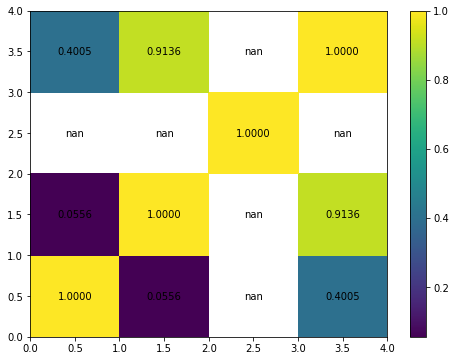

In [16]:
result = Correlation.corr(df, "features", method="pearson")

result.printSchema()

result_array = result.head()['pearson(features)'].toArray()
pandas_df = pd.DataFrame(result_array)
display(pandas_df)

plot_heatmap(pandas_df)

#### spearman

root
 |-- spearman(features): matrix (nullable = false)



,0,1,2,3
0,1.000000,0.105409,NaN,0.400000
1,0.105409,1.000000,NaN,0.948683
2,NaN,NaN,1.0,NaN
3,0.400000,0.948683,NaN,1.000000


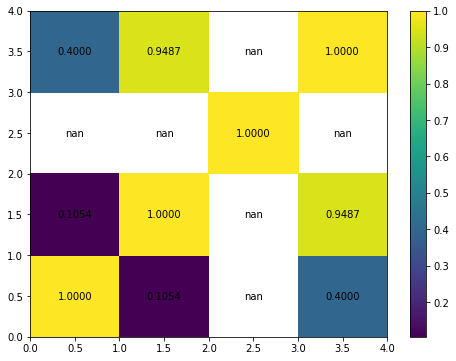

In [17]:
result = Correlation.corr(df, "features", method="spearman")

result.printSchema()

result_array = result.head()['spearman(features)'].toArray()
pandas_df = pd.DataFrame(result_array)
display(pandas_df)

plot_heatmap(pandas_df)

### Hypothesis Testing

#### Pearson’s Chi-squared Test
- Independence test for every feature against the label.
- degreesOfFreedom : the number of values in the final calculation of a statistic that are free to vary. (k-1)
- statistics : 검정 통계량은 표본 데이터에서 계산되어 가설 검정에 사용되는 랜덤 변수입니다. 검정 통계량을 사용하여 귀무 가설의 기각 여부를 확인할 수 있습니다. 검정 통계량은 데이터를 귀무 가설 하에서 기대되는 값과 비교합니다. 검정 통계량은 p-값을 계산하기 위해 사용됩니다. 가설 검정마다 귀무 가설에서 가정된 확률 모형을 기반으로 각기 다른 검정 통계량을 사용합니다.
  - 카이-제곱 검정 통계량

    $
\begin{equation}
{\displaystyle E_{i} = n {\sum _{i=1}^{k}{p_{i}}} }
\end{equation}
$

    $
\begin{equation}
{\displaystyle \chi ^{2} = {\sum _{i=1}^{k}{\frac {(O_{i}-E_{i})^{2}} {E_{i}} }}}
\end{equation}
$
    - n : 샘플 수
    - k : 구별 범주의 수
    - p$_{i}$ : i번째 범주에 대한 검정 비율
    - O$_{i}$ : i번째 범주에 대한 관측값
    - E$_{i}$ : i번째 범주에 대한 기대값  


| _            | A   | B   | C   | D   | Total |
|--------------|-----|-----|-----|-----|-------|
| White collar | 90  | 60  | 104 | 95  | 349   |
| Blue collar  | 30  | 50  | 51  | 20  | 151   |
| No collar    | 30  | 40  | 45  | 35  | 150   |
| Total        | 150 | 150 | 200 | 150 | 650   |

$150\times\frac{349}{650} \approx 80.54$

$\frac{\left(\text{observed}-\text{expected}\right)^2}{\text{expected}} = \frac{\left(90-80.54\right)^2}{80.54} \approx 1.11$

In [36]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import ChiSquareTest

data = [[0, Vectors.dense([0, 10, 1])],
        [0, Vectors.dense([1, 10, 1])],
        [0, Vectors.dense([2, 10, 1])],
        [1, Vectors.dense([3, 11, 1])],
        [1, Vectors.dense([4, 11, 1])],
        [1, Vectors.dense([5, 11, 1])]]

df = spark.createDataFrame(data, ["label", "features"])

result = ChiSquareTest.test(df, "features", "label")

result.printSchema()
result.show(truncate=False)

null_hypotheses = 'Independence'
alternative_hypotheses = 'Not independence'
significance_level = 0.05
pValues = result.head().pValues

for pValue in pValues:
    if pValue <= significance_level:
        print "{} (reject null hypotheses)".format(alternative_hypotheses)
    else:
        print "{} (fail to reject null hypotheses)".format(null_hypotheses)

root
 |-- pValues: vector (nullable = true)
 |-- degreesOfFreedom: array (nullable = true)
 |    |-- element: integer (containsNull = false)
 |-- statistics: vector (nullable = true)

+--------------------------------------------+----------------+-------------+
|pValues                                     |degreesOfFreedom|statistics   |
+--------------------------------------------+----------------+-------------+
|[0.3062189184132784,0.01430587843542952,1.0]|[5, 1, 0]       |[6.0,6.0,0.0]|
+--------------------------------------------+----------------+-------------+

Independence (fail to reject null hypotheses)
Not independence (reject null hypotheses)
Independence (fail to reject null hypotheses)


feature1

| _     | 0 | 1 | 2 | 3 | 4 | 5 | Total |
|-------|---|---|---|---|---|---|-------|
| 0     | 1 | 1 | 1 | 0 | 0 | 0 | 3     |
| 1     | 0 | 0 | 0 | 1 | 1 | 1 | 3     |
| Total | 1 | 1 | 1 | 1 | 1 | 1 | 6     |

모든 셀의 기댓값은 $1\times\frac{3}{6} = 0.5$

$\frac{\left(1-0.5\right)^2}{0.5} = 0.5$ => 6개

$\frac{\left(0-0.5\right)^2}{0.5} = 0.5$ => 6개

총 합은 : 0.5 * 12 = 6

#### Kolmogorov Smirnov (콜모고로프-스미르노프) Test
- Normality Test

In [21]:
import numpy as np
import pandas as pd
from pyspark.ml.stat import KolmogorovSmirnovTest

mean = 0.0
stdev = 1.0
variance = stdev**2
size = 1000
sample = np.random.normal(mean, stdev, size)
pandas_df = pd.DataFrame(sample, columns=['sample'])
data = spark.createDataFrame(pandas_df, ['sample'])

result = KolmogorovSmirnovTest.test(data, 'sample', 'norm', mean, variance)

result.printSchema()
result.show(truncate=False)

null_hypotheses = 'The sample data comes from normal distribution'
alternative_hypotheses = 'The sample data does not comes from normal distribution'
significance_level = 0.05
pValue = result.head().pValue
if pValue <= significance_level:
    print "{} (reject null hypotheses)".format(alternative_hypotheses)
else:
    print "{} (fail to reject null hypotheses)".format(null_hypotheses)


root
 |-- pValue: double (nullable = false)
 |-- statistic: double (nullable = false)

+------------------+--------------------+
|pValue            |statistic           |
+------------------+--------------------+
|0.4925762238666973|0.026155067322961745|
+------------------+--------------------+

The sample data comes from normal distribution (fail to reject null hypotheses)


### Summarizer

- mean: a vector that contains the coefficient-wise mean.
- variance: a vector that contains the coefficient-wise variance.
- count: the count of all vectors seen.
- numNonzeros: a vector with the number of non-zeros for each coefficients
- max: the maximum for each coefficient.
- min: the minimum for each coefficient.
- normL2: the Euclidean norm for each coefficient.
- normL1: the L1 norm of each coefficient (sum of the absolute values).

In [22]:
from pyspark.ml.stat import Summarizer
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors

df = sc.parallelize([Row(weight=1.0, features=Vectors.dense(1.0, 2.0, 1.0)),
                     Row(weight=0.5, features=Vectors.dense(2.0, 2.0, 1.0)),
                     Row(weight=0.0, features=Vectors.dense(3.0, 2.0, 1.0)),
                     Row(weight=0.0, features=Vectors.dense(4.0, 2.0, 1.0))]).toDF()

# create summarizer for multiple metrics "mean" and "count"
summarizer = Summarizer.metrics("mean", "count", "min", "max", "normL1")

# compute statistics for multiple metrics with weight
df.select(summarizer.summary(df.features, df.weight)).show(truncate=False)

# compute statistics for multiple metrics without weight
df.select(summarizer.summary(df.features)).show(truncate=False)

# compute statistics for single metric "mean" with weight
df.select(Summarizer.mean(df.features, df.weight)).show(truncate=False)

# compute statistics for single metric "mean" without weight
df.select(Summarizer.mean(df.features)).show(truncate=False)

+------------------------------------------------------------------------------+
|aggregate_metrics(features, weight)                                           |
+------------------------------------------------------------------------------+
|[[1.3333333333333333,2.0,1.0], 2, [1.0,2.0,1.0], [2.0,2.0,1.0], [2.0,3.0,1.5]]|
+------------------------------------------------------------------------------+

+----------------------------------------------------------------+
|aggregate_metrics(features, 1.0)                                |
+----------------------------------------------------------------+
|[[2.5,2.0,1.0], 4, [1.0,2.0,1.0], [4.0,2.0,1.0], [10.0,8.0,4.0]]|
+----------------------------------------------------------------+

+----------------------------+
|mean(features)              |
+----------------------------+
|[1.3333333333333333,2.0,1.0]|
+----------------------------+

+--------------+
|mean(features)|
+--------------+
|[2.5,2.0,1.0] |
+--------------+



## Feature Engineering
- pyspark.ml.feature module

### Polynomial Expansion
- Polynomial expansion is the process of expanding your features into a polynomial space, which is formulated by an n-degree combination of original dimensions. 
- The example below shows how to expand your features into a 3-degree polynomial space.

In [31]:
from pyspark.ml.feature import PolynomialExpansion
from pyspark.ml.linalg import Vectors

df = spark.createDataFrame([
    (Vectors.dense([2.0, 1.0]),),
    (Vectors.dense([0.0, 0.0]),),
    (Vectors.dense([3.0, -1.0]),)
], ["features"])

polyExpansion = PolynomialExpansion(degree=3, inputCol="features", outputCol="polyFeatures")
polyDF = polyExpansion.transform(df)

polyDF.show(truncate=False)

+----------+------------------------------------------+
|features  |polyFeatures                              |
+----------+------------------------------------------+
|[2.0,1.0] |[2.0,4.0,8.0,1.0,2.0,4.0,1.0,2.0,1.0]     |
|[0.0,0.0] |[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]     |
|[3.0,-1.0]|[3.0,9.0,27.0,-1.0,-3.0,-9.0,1.0,3.0,-1.0]|
+----------+------------------------------------------+



degree=2

$
\begin{equation}
x + x^{2} + y + xy + y^{2}
\end{equation}
$

degree=3

$
\begin{equation}
x + x^{2} + x^{3} + y + xy + x^{2}y + y^{2} + xy^{2} + y^{3}
\end{equation}
$

### Dimensionality Reduction

#### Principal Component Analysis
pyspark.ml.feature.PCA

In [33]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors

data = [(Vectors.sparse(5, [(1, 1.0), (3, 7.0)]),),
        (Vectors.dense([2.0, 0.0, 3.0, 4.0, 5.0]),),
        (Vectors.dense([4.0, 0.0, 0.0, 6.0, 7.0]),)]
df = spark.createDataFrame(data, ["features"])

pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(df)

print "a principal components Matrix. Each column is one principal component.", model.pc

model.transform(df).show()
result = model.transform(df).select("pcaFeatures")
result.show(truncate=False)

DenseMatrix([[-0.44859172, -0.28423808,  0.08344545],
             [ 0.13301986, -0.05621156,  0.04423979],
             [-0.12523156,  0.76362648, -0.57807123],
             [ 0.21650757, -0.56529588, -0.79554051],
             [-0.84765129, -0.11560341, -0.15501179]])
+--------------------+--------------------+
|            features|         pcaFeatures|
+--------------------+--------------------+
| (5,[1,3],[1.0,7.0])|[1.64857282308838...|
|[2.0,0.0,3.0,4.0,...|[-4.6451043317815...|
|[4.0,0.0,0.0,6.0,...|[-6.4288805356764...|
+--------------------+--------------------+

+-----------------------------------------------------------+
|pcaFeatures                                                |
+-----------------------------------------------------------+
|[1.6485728230883807,-4.013282700516296,-5.524543751369388] |
|[-4.645104331781534,-1.1167972663619026,-5.524543751369387]|
|[-6.428880535676489,-5.337951427775355,-5.524543751369389] |
+-----------------------------------------------

## Estimators (Models)

### Regression
pyspark.ml.regression module

#### Linear Regression

In [ ]:
from pyspark.ml.regression import LinearRegression

# Load training data
training = spark.read.format("libsvm")\
    .load("/opt/conda/envs/ml/lib/python2.7/site-packages/pyspark/data/mllib/sample_linear_regression_data.txt")
training.printSchema()
print "First row:\n{}\n".format(training.first())

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for linear regression
print "Coefficients:\n{}\n".format(lrModel.coefficients)
print "Intercept:\n{}\n".format(lrModel.intercept)

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print "numIterations:\n{}\n".format(trainingSummary.totalIterations)
print "objectiveHistory:\n{}\n".format(trainingSummary.objectiveHistory)
trainingSummary.residuals.show()
print "RMSE:\n{}\n".format(trainingSummary.rootMeanSquaredError)
print "r2:\n{}\n".format(trainingSummary.r2)

#### Generalized Linear Regression

Fit a Generalized Linear Model specified by giving a symbolic description of the linear predictor (link function) and a description of the error distribution (family). It supports “gaussian”, “binomial”, “poisson”, “gamma” and “tweedie” as family. Valid link functions for each family is listed below. The first link function of each family is the default one.
- “gaussian” -> “identity”, “log”, “inverse”
- “binomial” -> “logit”, “probit”, “cloglog”
- “poisson” -> “log”, “identity”, “sqrt”
- “gamma” -> “inverse”, “identity”, “log”
- “tweedie” -> power link function specified through “linkPower”. The default link power in the tweedie family is 1 - variancePower.

In [ ]:
from pyspark.ml.regression import GeneralizedLinearRegression

# Load training data
dataset = spark.read.format("libsvm")\
    .load("/opt/conda/envs/ml/lib/python2.7/site-packages/pyspark/data/mllib/sample_linear_regression_data.txt")

glr = GeneralizedLinearRegression(family="gaussian", link="identity", maxIter=10, regParam=0.3)

# Fit the model
model = glr.fit(dataset)

# Print the coefficients and intercept for generalized linear regression model
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))

# Summarize the model over the training set and print out some metrics
summary = model.summary
print("Coefficient Standard Errors: " + str(summary.coefficientStandardErrors))
print("T Values: " + str(summary.tValues))
print("P Values: " + str(summary.pValues))
print("Dispersion: " + str(summary.dispersion))
print("Null Deviance: " + str(summary.nullDeviance))
print("Residual Degree Of Freedom Null: " + str(summary.residualDegreeOfFreedomNull))
print("Deviance: " + str(summary.deviance))
print("Residual Degree Of Freedom: " + str(summary.residualDegreeOfFreedom))
print("AIC: " + str(summary.aic))
print("Deviance Residuals: ")
summary.residuals().show()

### Classification
pyspark.ml.classification module

#### Logistic Regression

##### Binomial logistic regression
- coefficients and intercept methods on a logistic regression model trained with multinomial family are not supported. Use coefficientMatrix and interceptVector instead.

In [ ]:
from pyspark.ml.classification import LogisticRegression

# Load training data
training = spark.read.format("libsvm").load("/opt/conda/envs/ml/lib/python2.7/site-packages/pyspark/data/mllib/sample_libsvm_data.txt")
training.show()

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

# We can also use the multinomial family for binary classification
mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")

# Fit the model
mlrModel = mlr.fit(training)

# Print the coefficients and intercepts for logistic regression with multinomial family
print("Multinomial coefficients: " + str(mlrModel.coefficientMatrix))
print("Multinomial intercepts: " + str(mlrModel.interceptVector))

In [ ]:
# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example
trainingSummary = lrModel.summary

print "accuracy:", trainingSummary.accuracy

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
print "ROC:"
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

print "fMeasureByLabel:", trainingSummary.fMeasureByLabel()

print "fMeasureByThreshold:"
# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
fMeasure.show()
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

print "falsePositiveRateByLabel:", trainingSummary.falsePositiveRateByLabel

print "labels:", trainingSummary.labels

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

print("precision-recall curve:")
trainingSummary.pr.show()

# ...


##### Multinomial logistic regression
- This is supported via multinomial logistic (`softmax`) regression.

In [ ]:
from pyspark.ml.classification import LogisticRegression

# Load training data
training = spark \
    .read \
    .format("libsvm") \
    .load("/opt/conda/envs/ml/lib/python2.7/site-packages/pyspark/data/mllib/sample_multiclass_classification_data.txt")

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for multinomial logistic regression
print("Coefficients: \n" + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

#### Linear Support Vector Machine Classifier
- This binary classifier optimizes the Hinge Loss using the OWLQN optimizer.
- Only supports L2 regularization currently.
- Support only binary classification with linear SVM.

In [ ]:
from pyspark.ml.classification import LinearSVC

# Load training data
training = spark.read.format("libsvm").load("/opt/conda/envs/ml/lib/python2.7/site-packages/pyspark/data/mllib/sample_libsvm_data.txt")

lsvc = LinearSVC(maxIter=10, regParam=0.1)

# Fit the model
lsvcModel = lsvc.fit(training)

print lsvcModel.numFeatures
print lsvcModel.numClasses

# Print the coefficients and intercept for linear SVC
print("Coefficients: " + str(lsvcModel.coefficients))
print("Intercept: " + str(lsvcModel.intercept))

#### Decision Tree Classifier
- It supports both binary and multiclass labels, as well as both continuous and categorical features.

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load the data stored in LIBSVM format as a DataFrame.
data = spark.read.format("libsvm").load("/opt/conda/envs/ml/lib/python2.7/site-packages/pyspark/data/mllib/sample_libsvm_data.txt")

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)
dt_model = model.stages[2]
print dt_model.numNodes
print dt_model.depth
print dt_model.featureImportances
print dt_model.numFeatures
print dt_model.numClasses
print dt_model.toDebugString

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(20)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[2]
# summary only
print(treeModel)

#### Random Forest Classifier
- It supports both binary and multiclass labels, as well as both continuous and categorical features.

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load and parse the data file, converting it to a DataFrame.
data = spark.read.format("libsvm").load("/opt/conda/envs/ml/lib/python2.7/site-packages/pyspark/data/mllib/sample_libsvm_data.txt")

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)

# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=10)

# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("predictedLabel", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

rfModel = model.stages[2]
print(rfModel)  # summary only

#### Gradient-Boosted Tree Classifier

In [ ]:
# TBD

#### Naive Bayes Classifier

In [ ]:
# TBD

#### Multilayer Perceptron Classifier

In [ ]:
# TBD

### Clustering
pyspark.ml.clustering module

#### K-means
- The MLlib implementation includes a parallelized variant of the [k-means++](http://en.wikipedia.org/wiki/K-means%2B%2B) method called [kmeans||](http://theory.stanford.edu/~sergei/papers/vldb12-kmpar.pdf) (pronounced. as. KMeans. Parallel).

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Loads data.
dataset = spark.read.format("libsvm").load("/opt/conda/envs/ml/lib/python2.7/site-packages/pyspark/data/mllib/sample_kmeans_data.txt")

# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

# Make predictions
predictions = model.transform(dataset)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

#### Bisecting K-means
- Bisecting k-means is a kind of hierarchical clustering using a divisive (or “top-down”) approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.
- Bisecting K-means can often be much faster than regular K-means, but it will generally produce a different clustering.

In [ ]:
from pyspark.ml.clustering import BisectingKMeans

# Loads data.
dataset = spark.read.format("libsvm").load("/opt/conda/envs/ml/lib/python2.7/site-packages/pyspark/data/mllib/sample_kmeans_data.txt")

# Trains a bisecting k-means model.
bkm = BisectingKMeans().setK(2).setSeed(1)
model = bkm.fit(dataset)

# Evaluate clustering.
cost = model.computeCost(dataset)
print("Within Set Sum of Squared Errors = " + str(cost))

# Shows the result.
print("Cluster Centers: ")
centers = model.clusterCenters()
for center in centers:
    print(center)

#### Gaussian Mixture Model (GMM)
- This implementation uses the expectation-maximization algorithm to induce the maximum-likelihood model given a set of samples.
- For high-dimensional data (with many features), this algorithm may perform poorly

In [ ]:
from pyspark.ml.clustering import GaussianMixture

# loads data
dataset = spark.read.format("libsvm").load("/opt/conda/envs/ml/lib/python2.7/site-packages/pyspark/data/mllib/sample_kmeans_data.txt")

gmm = GaussianMixture().setK(2).setSeed(538009335)
model = gmm.fit(dataset)

print("Gaussians shown as a DataFrame: ")
model.gaussiansDF.show(truncate=False)

#### Latent Dirichlet Allocation (잠재 디리클레 할당)
- a topic modeling angorithm for text documents.
- Terminology:
  - “term” = “word”: an element of the vocabulary
  - “token”: instance of a term appearing in a document
  - “topic”: multinomial distribution over terms representing some concept
  - “document”: one piece of text, corresponding to one row in the input data
- Original LDA paper (journal version): Blei, Ng, and Jordan. “Latent Dirichlet Allocation.” JMLR, 2003.
- Input data (featuresCol): LDA is given a collection of documents as input data, via the featuresCol parameter. Each document is specified as a Vector of length vocabSize, where each entry is the count for the corresponding term (word) in the document. Feature transformers such as pyspark.ml.feature.Tokenizer and pyspark.ml.feature.CountVectorizer can be useful for converting text to word count vectors.

In [ ]:
from pyspark.ml.clustering import LDA

# Loads data.
dataset = spark.read.format("libsvm").load("/opt/conda/envs/ml/lib/python2.7/site-packages/pyspark/data/mllib/sample_lda_libsvm_data.txt")

# Trains a LDA model.
lda = LDA(k=10, maxIter=10)
model = lda.fit(dataset)

ll = model.logLikelihood(dataset)
lp = model.logPerplexity(dataset)
print("The lower bound on the log likelihood of the entire corpus: " + str(ll))
print("The upper bound on perplexity: " + str(lp))

# Describe topics.
topics = model.describeTopics(3)
print("The topics described by their top-weighted terms:")
topics.show(truncate=False)

# Shows the result
transformed = model.transform(dataset)
transformed.show(truncate=False)

### Anomaly Detection

#### Gaussian Distribution

#### Mutivariate Gaussian Distribution

### Recommendation
pyspark.ml.recommendation module

#### Alternating Least Squares

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row

lines = spark.read.text("/opt/conda/envs/ml/lib/python2.7/site-packages/pyspark/data/mllib/als/sample_movielens_ratings.txt").rdd
parts = lines.map(lambda row: row.value.split("::"))
ratingsRDD = parts.map(lambda p: Row(userId=int(p[0]), movieId=int(p[1]),
                                     rating=float(p[2]), timestamp=long(p[3])))
ratings = spark.createDataFrame(ratingsRDD)
(training, test) = ratings.randomSplit([0.8, 0.2])

# Build the recommendation model using ALS on the training data
# Note we set cold start strategy to 'drop' to ensure we don't get NaN evaluation metrics
als = ALS(maxIter=5, regParam=0.01, userCol="userId", itemCol="movieId", ratingCol="rating", coldStartStrategy="drop")
#als = ALS(maxIter=5, regParam=0.01, userCol="userId", itemCol="movieId", ratingCol="rating", implicitPrefs=True)
model = als.fit(training)

# Evaluate the model by computing the RMSE on the test data
predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating",
                                predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

# Generate top 10 movie recommendations for each user
userRecs = model.recommendForAllUsers(10)
userRecs.show(5, truncate=False)

# Generate top 10 user recommendations for each movie
movieRecs = model.recommendForAllItems(10)
movieRecs.show(5, truncate=False)

# Generate top 10 movie recommendations for a specified set of users
users = ratings.select(als.getUserCol()).distinct().limit(3)
users.show()
userSubsetRecs = model.recommendForUserSubset(users, 10)
userSubsetRecs.show(5, truncate=False)

# Generate top 10 user recommendations for a specified set of movies
movies = ratings.select(als.getItemCol()).distinct().limit(3)
movies.show()
movieSubSetRecs = model.recommendForItemSubset(movies, 10)
userSubsetRecs.show(5, truncate=False)


#### Frequent Pattern Mining
pyspark.ml.fpm module

- A parallel FP-growth algorithm to mine frequent itemsets.
- The algorithm is described in Li et al., PFP: Parallel FP-Growth for Query Recommendation [LI2008](http://dx.doi.org/10.1145/1454008.1454027).
- PFP distributes computation in such a way that each worker executes an independent group of mining tasks.
- The FP-Growth algorithm is described in Han et al., Mining frequent patterns without candidate generation [HAN2000](http://dx.doi.org/10.1145/335191.335372)

- Mining frequent items, itemsets, subsequences, or other substructures is usually among the first steps to analyze a large-scale dataset, which has been an active research topic in data mining for years. We refer users to Wikipedia’s association rule learning for more information.
- ...

In [ ]:
from pyspark.ml.fpm import FPGrowth

df = spark.createDataFrame([
    (0, [1, 2, 5]),
    (1, [1, 2, 3, 5]),
    (2, [1, 2])
], ["id", "items"])

fpGrowth = FPGrowth(itemsCol="items", minSupport=0.5, minConfidence=0.6)
model = fpGrowth.fit(df)

# Display frequent itemsets.
model.freqItemsets.show()

# Display generated association rules.
model.associationRules.show()

# transform examines the input items against all the association rules and summarize the
# consequents as prediction
model.transform(df).show()

## Model Evaluation
- pyspark.ml.evaluation module

### Metrics

#### 

In [ ]:
# TBD

#### 

In [ ]:
# TBD

### Cross Validation
pyspark.ml.tuning module

In [ ]:
# TBD

### Hyperparameter Tuning
pyspark.ml.tuning module

In [ ]:
# TBD

### Learning Curve

In [ ]:
# TBD

### Validation Curve

In [ ]:
# TBD

## Pipeline
pyspark.ml.Pipeline and pyspark.ml.PipelineModel


- `Transformer` : Abstract class for transformers that `transform one dataset into another`.

- `UnaryTransformer` : Abstract class for transformers that `take one input column, apply transformation, and output the result as a new column`.

- `Estimator` : Abstract class for estimators that `fit models to data`.

- `Model` : Abstract class for `models that are fitted by estimators`.

- `Pipeline` : A simple pipeline, which `acts as an estimator`. A Pipeline consists of a sequence of stages, each of which is either an Estimator or a Transformer. When Pipeline.fit() is called, the stages are executed in order. The fitted model from a Pipeline is a PipelineModel, which consists of fitted models and transformers, corresponding to the pipeline stages. If stages is an empty list, the pipeline acts as an identity transformer.
  - If a stage is an `Estimator`, its `Estimator.fit()` method will be called on the input dataset to fit a model. Then the model, which is a transformer, will be used to transform the dataset as the input to the next stage. 
  - If a stage is a `Transformer`, its `Transformer.transform()` method will be called to produce the dataset for the next stage. 

- `PipelineModel` : Represents `a compiled pipeline with transformers and fitted models`.

- `DAG Pipelines`: A Pipeline’s stages are specified as an ordered array. The examples given here are all for linear Pipelines, i.e., Pipelines in which each stage uses data produced by the previous stage. It is possible to create non-linear Pipelines as long as the data flow graph forms a Directed Acyclic Graph (DAG). This graph is currently specified implicitly based on the input and output column names of each stage (generally specified as parameters). If the Pipeline forms a DAG, then the stages must be specified in topological order.

- `Runtime checking`: Since Pipelines can operate on DataFrames with varied types, they cannot use compile-time type checking. Pipelines and PipelineModels instead do runtime checking before actually running the Pipeline. This type checking is done using the DataFrame schema, a description of the data types of columns in the DataFrame.

- `Unique Pipeline stages`: A Pipeline’s stages should be unique instances. E.g., the same instance myHashingTF should not be inserted into the Pipeline twice since Pipeline stages must have unique IDs. However, different instances myHashingTF1 and myHashingTF2 (both of type HashingTF) can be put into the same Pipeline since different instances will be created with different IDs.

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer

# Prepare training documents from a list of (id, text, label) tuples.
training = spark.createDataFrame([
    (0, "a b c d e spark", 1.0),
    (1, "b d", 0.0),
    (2, "spark f g h", 1.0),
    (3, "hadoop mapreduce", 0.0)
], ["id", "text", "label"])

# Configure an ML pipeline, which consists of three stages: tokenizer, hashingTF, and lr.
tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
lr = LogisticRegression(maxIter=10, regParam=0.001)
pipeline = Pipeline(stages=[tokenizer, hashingTF, lr])

# Fit the pipeline to training documents.
model = pipeline.fit(training)

# Prepare test documents, which are unlabeled (id, text) tuples.
test = spark.createDataFrame([
    (4, "spark i j k"),
    (5, "l m n"),
    (6, "spark hadoop spark"),
    (7, "apache hadoop")
], ["id", "text"])

# Make predictions on test documents and print columns of interest.
prediction = model.transform(test)
selected = prediction.select("id", "text", "probability", "prediction")
for row in selected.collect():
    rid, text, prob, prediction = row
    print("(%d, %s) --> prob=%s, prediction=%f" % (rid, text, str(prob), prediction))

## Reference

- https://spark.apache.org/docs/latest/ml-guide.html
- https://www.wikipedia.org/